In [17]:
from ultralytics import YOLO

# Load mô hình YOLOv8
yolo9 = YOLO('Z:/traffic_detection/report/results_11s_enhance/yolov11s_vehicle_enhancedata.pt')  
# Đọc ảnh và xuất kết quả dự đoán
results = yolo9.predict(source='Z:/traffic_detection/report/enhanced_image_22.jpg')

results[0].show()  # Hiển thị kết quả dự đoán


image 1/1 Z:\traffic_detection\report\enhanced_image_22.jpg: 384x640 5 0s, 10 1s, 1 3, 60.0ms
Speed: 1.0ms preprocess, 60.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


In [11]:
from ultralytics import YOLO

# Load mô hình YOLOv8
model = YOLO('Z:/traffic_detection/report/results_v8s_enhance/yolov8s_enhance_vehicle.pt') 

In [12]:
 

# Đánh giá mô hình trên tập dữ liệu validation
val_results = model.val(
    data='Z:/traffic_detection/report/hphat-yaml/data.yaml',  # Đường dẫn đến file cấu hình dataset (data.yaml)
    conf=0.5  # Ngưỡng confidence
)

# In kết quả đánh giá
print(val_results)


Ultralytics 8.3.49  Python-3.11.4 torch-2.5.1+cpu CPU (AMD Ryzen 7 6800H with Radeon Graphics)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 2.13MB/s]
val: Scanning Z:\traffic_detection\report\data\val\daytime\labels... 2066 images, 1 backgrounds, 0 corrupt: 100%|██████████| 2067/2067 [00:04<00:00, 447.71it/s]

val: WARNING  Z:\traffic_detection\report\data\val\daytime\images\cam_02_00951.jpg: 1 duplicate labels removed
val: WARNING  Z:\traffic_detection\report\data\val\daytime\images\cam_04_00881.jpg: 1 duplicate labels removed
val: WARNING  Z:\traffic_detection\report\data\val\daytime\images\cam_04_00915.jpg: 1 duplicate labels removed
val: WARNING  Z:\traffic_detection\report\data\val\daytime\images\cam_04_00947.jpg: 1 duplicate labels removed
val: WARNING  Z:\traffic_detection\report\data\val\daytime\images\cam_06_00803.jpg: 1 duplicate labels removed


val: New cache created: Z:\traffic_detection\report\data\val\daytime\labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 130/130 [02:27<00:00,  1.13s/it]


                   all       2067      22482       0.92      0.873      0.909      0.728
                     0       1800      13999      0.945      0.869      0.925      0.672
                     1       1456       4592      0.928      0.916      0.938       0.77
                     2        912       1356      0.935      0.856      0.902      0.794
                     3       1085       2535      0.871      0.852      0.871      0.677
Speed: 0.4ms preprocess, 62.0ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs\detect\val2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001D71FECEF10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005

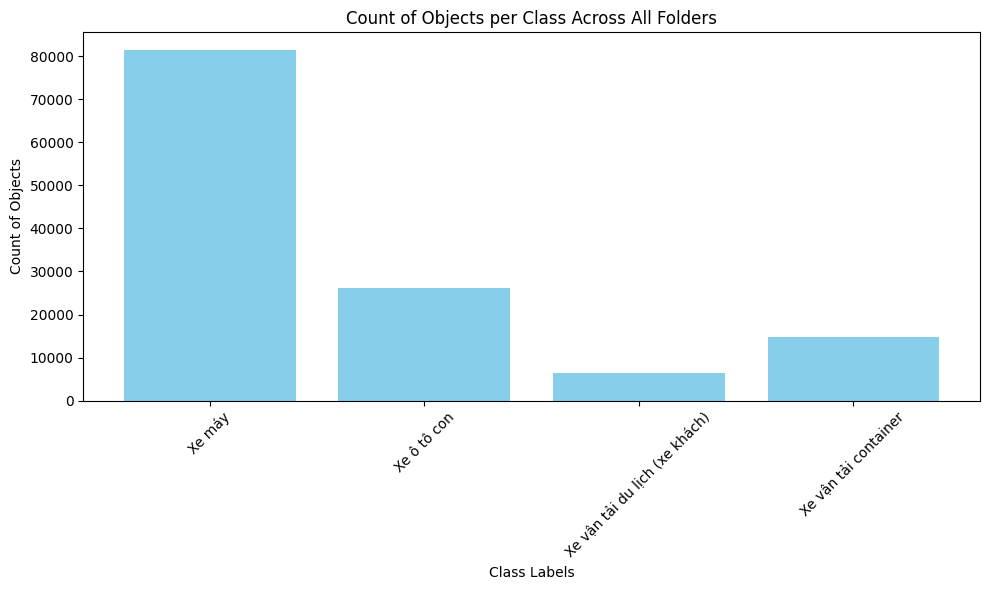

Total Images Processed: 11521
  Class  Count                     Class Name
0     0  81473                         Xe máy
1     1  26112                    Xe ô tô con
2     2   6497  Xe vận tải du lịch (xe khách)
3     3  14696           Xe vận tải container


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define paths for the four folders
folders = [
    'Z:/traffic_detection/report/data/train/daytime/labels',
    'Z:/traffic_detection/report/data/train/nighttime/labels',
    'Z:/traffic_detection/report/data/val/daytime/labels',
    'Z:/traffic_detection/report/data/val/nighttime/labels'
]

# Mapping class labels to human-readable names
class_mapping = {
    '0': 'Xe máy',
    '1': 'Xe ô tô con',
    '2': 'Xe vận tải du lịch (xe khách)',
    '3': 'Xe vận tải container'
}

# Initialize variables
total_images = 0
class_counts = {key: 0 for key in class_mapping.keys()}  # Initialize with all classes

# Process each folder
for folder in folders:
    if os.path.exists(folder):
        label_files = [f for f in os.listdir(folder) if f.endswith('.txt')]
        total_images += len(label_files)
        
        for file in label_files:
            file_path = os.path.join(folder, file)
            with open(file_path, 'r') as f:
                for line in f:
                    class_label = line.strip().split()[0]  # Get the class label
                    if class_label in class_counts:
                        class_counts[class_label] += 1
    else:
        print(f"Folder not found: {folder}")

# Convert counts to a DataFrame
df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])

# Map class labels to names and sort by class order
df['Class Name'] = df['Class'].map(class_mapping)
df = df.sort_values(by='Class').reset_index(drop=True)

# Plot a bar chart with the updated labels
plt.figure(figsize=(10, 6))
plt.bar(df['Class Name'], df['Count'], color='skyblue')
plt.xlabel('Class Labels')
plt.ylabel('Count of Objects')
plt.title('Count of Objects per Class Across All Folders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary
print(f"Total Images Processed: {total_images}")
print(df)


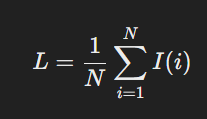


Trong đó:

𝐿: Độ sáng trung bình.
𝐼(𝑖)

I(i): Giá trị pixel tại vị trí 
𝑖 (có thể dùng kênh Grayscale hoặc giá trị trung bình của các kênh RGB).

𝑁: Tổng số pixel trong bức ảnh

In [19]:
import cv2
import numpy as np

def check_darkness(image_path, threshold=0.4):
    # Đọc ảnh và chuyển sang Grayscale
    image = cv2.imread(image_path)
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Chuẩn hóa giá trị pixel từ 0-255 sang 0-1
    normalized_gray = grayscale / 255.0
    
    # Tính độ sáng trung bình
    mean_brightness = np.mean(normalized_gray)
    
    # So sánh với ngưỡng
    if mean_brightness < threshold:
        print(f"Ảnh đủ tối (Độ sáng trung bình: {mean_brightness:.2f}), có thể áp dụng Zero-DCE.")
        return True
    else:
        print(f"Ảnh không đủ tối (Độ sáng trung bình: {mean_brightness:.2f}), không cần áp dụng Zero-DCE.")
        return False

# Kiểm tra với một bức ảnh
image_path = 'Z:/traffic_detection/report/enhanced_image_22.jpg'
check_darkness(image_path, threshold=0.4)


Ảnh đủ tối (Độ sáng trung bình: 0.22), có thể áp dụng Zero-DCE.


True